In [113]:
# -----------------------------------------------
# Appendix of Libraries/Packages in Order of Use 
# -----------------------------------------------

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [114]:
# ----------------------------------------------------------------
# Data Importing from the "Bids and Offers" Workbook in Section 6
# ----------------------------------------------------------------

import pickle
import pandas as pd
import matplotlib.pyplot as plt

def load_and_prepare_equilibrium_data(file_path="equilibrium_strategies_constrained.pkl"):
    """Load equilibrium data with validation and structure checks"""
    try:
        with open(file_path, "rb") as f:
            equilibrium_data = pickle.load(f)
            
        # Validate data structure
        required_keys = {'buyers', 'sellers'}
        if not required_keys.issubset(equilibrium_data.keys()):
            missing = required_keys - equilibrium_data.keys()
            raise ValueError(f"Missing required keys in pickle file: {missing}")
          
        # ----------------------------------------------------------------------------------------
        # Data Structure for the Buyer and Seller from Definition 11 (Equilibrium Data Structure)
        # ----------------------------------------------------------------------------------------
        
        buyers = equilibrium_data['buyers']
        df_buyers = pd.DataFrame(
            buyers['data'],
            columns=buyers['columns']
        )
        
        # Extract and validate seller data
        sellers = equilibrium_data['sellers']
        df_sellers = pd.DataFrame(
            sellers['data'],
            columns=sellers['columns']
        )
        
        # --------------------------------------------------------------
        # Column Structuring for the Buyer and Seller from Defintion 11
        # --------------------------------------------------------------
        
        numeric_cols = ['Buyer Valuation', 'Optimal Bid B*(vb)', 'Buyer Utility',
                       'Seller Valuation', 'Optimal Offer S*(vs)', 'Seller Utility']
        for col in numeric_cols:
            if col in df_buyers:
                df_buyers[col] = pd.to_numeric(df_buyers[col], errors='coerce')
            if col in df_sellers:
                df_sellers[col] = pd.to_numeric(df_sellers[col], errors='coerce')
                
        return df_buyers, df_sellers
        
    except Exception as e:
        print(f"Error loading equilibrium data: {str(e)}")
        return None, None

# --------------------------
# Load data with validation
# --------------------------

buyer_strat, seller_strat = load_and_prepare_equilibrium_data()

if buyer_strat is not None and seller_strat is not None:
    
    # ------------------------------------------
    # Create visualization-ready data structure
    # ------------------------------------------
    
    equilibrium_vis_data = {
        'buyers': {
            'values': buyer_strat['Buyer Valuation'].values,
            'bids': buyer_strat['Optimal Bid B*(vb)'].values,
            'utilities': buyer_strat['Buyer Utility'].values
        },
        'sellers': {
            'values': seller_strat['Seller Valuation'].values,
            'offers': seller_strat['Optimal Offer S*(vs)'].values,
            'utilities': seller_strat['Seller Utility'].values
        },
        'price_range': (0.0, 1.0) 
    }

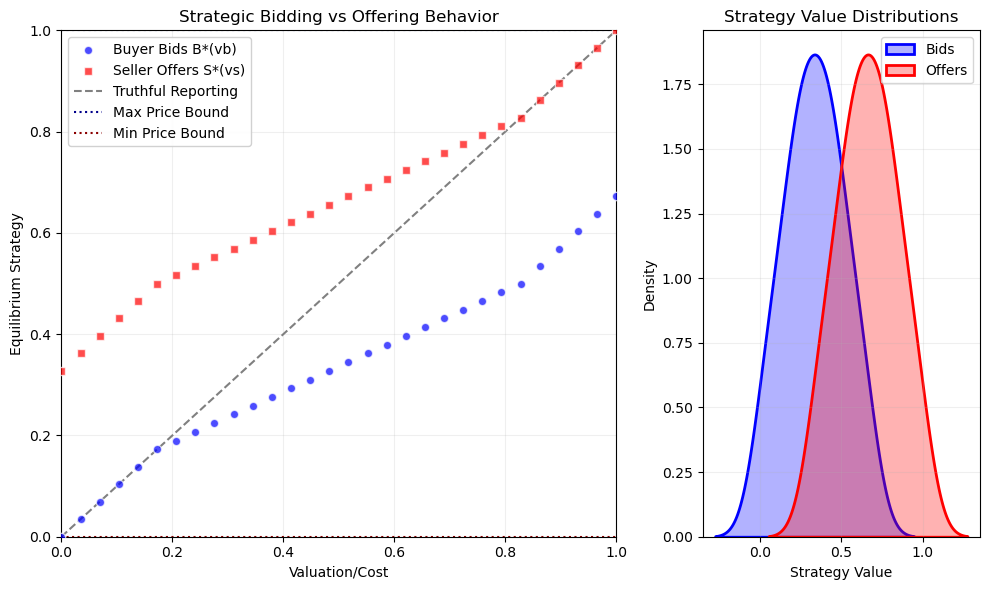


Strategic Equilibrium Diagnostics:

Buyer Strategy Summary:
------------------------------
       Buyer Valuation  Optimal Bid B*(vb)
count           30.000              30.000
mean             0.500               0.336
std              0.304               0.180
min              0.000               0.000
25%              0.250               0.211
50%              0.500               0.336
75%              0.750               0.461
max              1.000               0.672
Skewness: 0.000
Kurtosis: -0.697
        

Seller Strategy Summary:
------------------------------
       Seller Valuation  Optimal Offer S*(vs)
count            30.000                30.000
mean              0.500                 0.664
std               0.304                 0.180
min               0.000                 0.328
25%               0.250                 0.539
50%               0.500                 0.664
75%               0.750                 0.789
max               1.000                 1.000
Skewness

In [115]:
# ------------------------------------
# Equilibrium Strategy Visualizations
# ------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------
# Plot Visualization of Equilibrium Strategies from Figure 9
# -----------------------------------------------------------

def plot_strategic_equilibrium(equilibrium_data, buyer_df, seller_df):
    """Create publication-quality plots of equilibrium strategies with red/blue theme"""

    fig = plt.figure(figsize=(10, 6))
    gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])
    ax1 = fig.add_subplot(gs[0])
    
    # ------------------------
    # Plot Buyer Bids in Blue
    # ------------------------
    
    ax1.scatter(equilibrium_data['buyers']['values'],
                equilibrium_data['buyers']['bids'],
                c='blue', alpha=0.7, edgecolor='w',
                label='Buyer Bids B*(vb)', zorder=3)
    
    # --------------------------
    # Plot Seller Offers in Red
    # --------------------------
    
    ax1.scatter(equilibrium_data['sellers']['values'],
                equilibrium_data['sellers']['offers'],
                c='red', alpha=0.7, edgecolor='w',
                marker='s', label='Seller Offers S*(vs)', zorder=3)
    
    ax1.plot([0, 1], [0, 1], '--', c='gray', lw=1.5, 
            label='Truthful Reporting')
    ax1.axhline(equilibrium_data['price_range'][1], 
               c='darkblue', ls=':', lw=1.5, 
               label='Max Price Bound')
    ax1.axhline(equilibrium_data['price_range'][0],
               c='darkred', ls=':', lw=1.5,
               label='Min Price Bound')
    
    ax1.set(xlabel='Valuation/Cost', ylabel='Equilibrium Strategy',
           xlim=(0, 1), ylim=(0, 1), 
           title='Strategic Bidding vs Offering Behavior')
    ax1.grid(True, alpha=0.2)
    ax1.legend(loc='upper left', frameon=True, framealpha=0.9)

    # -------------------------------------------
    # Plot Distributions in Part (a) of Figure 9
    # -------------------------------------------
    
    ax2 = fig.add_subplot(gs[1])
    
    # ----------
    # KDE plots
    # ----------
    
    sns.kdeplot(equilibrium_data['buyers']['bids'], 
                ax=ax2, color='blue', label='Bids',
                linewidth=2, fill=True, alpha=0.3)
    sns.kdeplot(equilibrium_data['sellers']['offers'],
                ax=ax2, color='red', label='Offers',
                linewidth=2, fill=True, alpha=0.3)
    
    ax2.set(xlabel='Strategy Value', ylabel='Density',
           title='Strategy Value Distributions')
    ax2.legend()
    ax2.grid(True, alpha=0.2)

    plt.tight_layout()
    plt.show()
    
    # --------------------------------------------------
    # Algorithmic Formalization of Part (b) of Figure 9
    # --------------------------------------------------
    
    def format_summary(df, strategy_type):
        """Generate formatted strategy summary"""
        desc = df.describe().round(3)
        return f"""
{strategy_type} Strategy Summary:
------------------------------
{desc.to_string()}
Skewness: {df.iloc[:, 1].skew():.3f}
Kurtosis: {df.iloc[:, 1].kurtosis():.3f}
        """
    
    print("\nStrategic Equilibrium Diagnostics:")
    print("="*60)
    print(format_summary(buyer_df[['Buyer Valuation', 'Optimal Bid B*(vb)']], "Buyer"))
    print(format_summary(seller_df[['Seller Valuation', 'Optimal Offer S*(vs)']], "Seller"))

if buyer_strat is not None and seller_strat is not None:
    plot_strategic_equilibrium(equilibrium_vis_data, buyer_strat, seller_strat)
else:
    print("Cannot visualize - missing equilibrium data")

In [116]:
# -----------------------------------------------------------------------------
# Algorithmic Formalization of the "Good" Marker-Maker Mechanism (Section 6.1)
# -----------------------------------------------------------------------------

def good_mm(b_vals, b_bids, s_vals, s_offers):
    """
    Matches buyers/sellers to maximize trades using Myerson-Satterthwaite inspired subsidies
    without budget constraints. Prioritizes matches requiring smallest subsidies first.
    """
    
    # ---------------------------------------
    # Algorithmic Formalization of Method 10
    # ---------------------------------------
    
    
    # ------------------------------------------------
    # Generate Candidate Pairs as in (a) of Method 10
    # ------------------------------------------------
    
    candidates = []
    for i, (bv, bb) in enumerate(zip(b_vals, b_bids)):
        for j, (sv, sa) in enumerate(zip(s_vals, s_offers)):
            if bv >= sv: 
                subsidy = max(0, sa - bb)
                candidates.append((i, j, subsidy, bb >= sa))
    
    # ------------------------------------------
    # Compute Required Subsidies as in Part (b)
    # ------------------------------------------
    
    natural = [c for c in candidates if c[3]] 
    subsidized = sorted([c for c in candidates if not c[3]], 
                       key=lambda x: x[2])  

    # -----------------------------------------------------------------
    # Partition Candidates and Process Matches as in Parts (c) and (d)
    # -----------------------------------------------------------------
    
    used_b, used_s = set(), set()
    matched_pairs = []
    
    # ------------------------
    # Process Natural Matches
    # ------------------------
    
    for i, j, _, _ in natural:
        if i not in used_b and j not in used_s:
            used_b.add(i)
            used_s.add(j)
            matched_pairs.append(create_trade_entry(b_vals, b_bids, s_vals, s_offers, i, j, 0))
    
    # -------------------
    # Subsidized Matches
    # -------------------
    
    for i, j, subsidy, _ in subsidized:
        if i not in used_b and j not in used_s:
            used_b.add(i)
            used_s.add(j)
            matched_pairs.append(create_trade_entry(b_vals, b_bids, s_vals, s_offers, i, j, subsidy))

    total_subsidy = round(sum(p['subsidy'] for p in matched_pairs), 3)
    return matched_pairs, total_subsidy

def create_trade_entry(b_vals, b_bids, s_vals, s_offers, i, j, subsidy):
    return {
        "buyer_val": round(b_vals[i], 3),
        "buyer_bid": round(b_bids[i], 3),
        "seller_val": round(s_vals[j], 3),
        "seller_offer": round(s_offers[j], 3),
        "subsidy": round(subsidy, 3),
        "price": round((b_bids[i] + s_offers[j])/2, 3)
    }

# ----------------
# Print Figure 10
# ----------------

matched_pairs, total_subsidy = good_mm(
    equilibrium_vis_data['buyers']['values'],
    equilibrium_vis_data['buyers']['bids'],
    equilibrium_vis_data['sellers']['values'],
    equilibrium_vis_data['sellers']['offers']
)

# ----------------------------------
# Print "Good Market Maker Results"
# ----------------------------------

print('\n"Good" Market Maker Results:')
print("="*55)
print(f"Total Trades: {len(matched_pairs)}")
print(f"Total Subsidy: {total_subsidy:.3f}\n")

print("First 10 Trades:")
print("-"*55)
for idx, pair in enumerate(matched_pairs[:10], 1):
    print(f"Trade {idx}: B(v={pair['buyer_val']:.3f}, B={pair['buyer_bid']:.3f}) ↔ S(c={pair['seller_val']:.3f}, S={pair['seller_offer']:.3f})")
    print(f"Price: {pair['price']:.3f} | Subsidy: {pair['subsidy']:.3f}\n")

print("\nLast 10 Trades:")
print("-"*55) 
for idx, pair in enumerate(matched_pairs[-10:], len(matched_pairs)-14):
    print(f"Trade {idx}: B(v={pair['buyer_val']:.3f}, B={pair['buyer_bid']:.3f}) ↔ S(c={pair['seller_val']:.3f}, S={pair['seller_offer']:.3f})")
    print(f"Price: {pair['price']:.3f} | Subsidy: {pair['subsidy']:.3f}\n")

print("="*55)


"Good" Market Maker Results:
Total Trades: 16
Total Subsidy: 1.121

First 10 Trades:
-------------------------------------------------------
Trade 1: B(v=0.483, B=0.328) ↔ S(c=0.000, S=0.328)
Price: 0.328 | Subsidy: 0.000

Trade 2: B(v=0.552, B=0.362) ↔ S(c=0.034, S=0.362)
Price: 0.362 | Subsidy: 0.000

Trade 3: B(v=0.621, B=0.397) ↔ S(c=0.069, S=0.397)
Price: 0.397 | Subsidy: 0.000

Trade 4: B(v=0.690, B=0.431) ↔ S(c=0.103, S=0.431)
Price: 0.431 | Subsidy: 0.000

Trade 5: B(v=0.759, B=0.466) ↔ S(c=0.138, S=0.466)
Price: 0.466 | Subsidy: 0.000

Trade 6: B(v=0.828, B=0.500) ↔ S(c=0.172, S=0.500)
Price: 0.500 | Subsidy: 0.000

Trade 7: B(v=0.862, B=0.534) ↔ S(c=0.207, S=0.517)
Price: 0.526 | Subsidy: 0.000

Trade 8: B(v=0.897, B=0.569) ↔ S(c=0.241, S=0.534)
Price: 0.552 | Subsidy: 0.000

Trade 9: B(v=0.931, B=0.603) ↔ S(c=0.276, S=0.552)
Price: 0.578 | Subsidy: 0.000

Trade 10: B(v=0.966, B=0.638) ↔ S(c=0.310, S=0.569)
Price: 0.603 | Subsidy: 0.000


Last 10 Trades:
--------------------

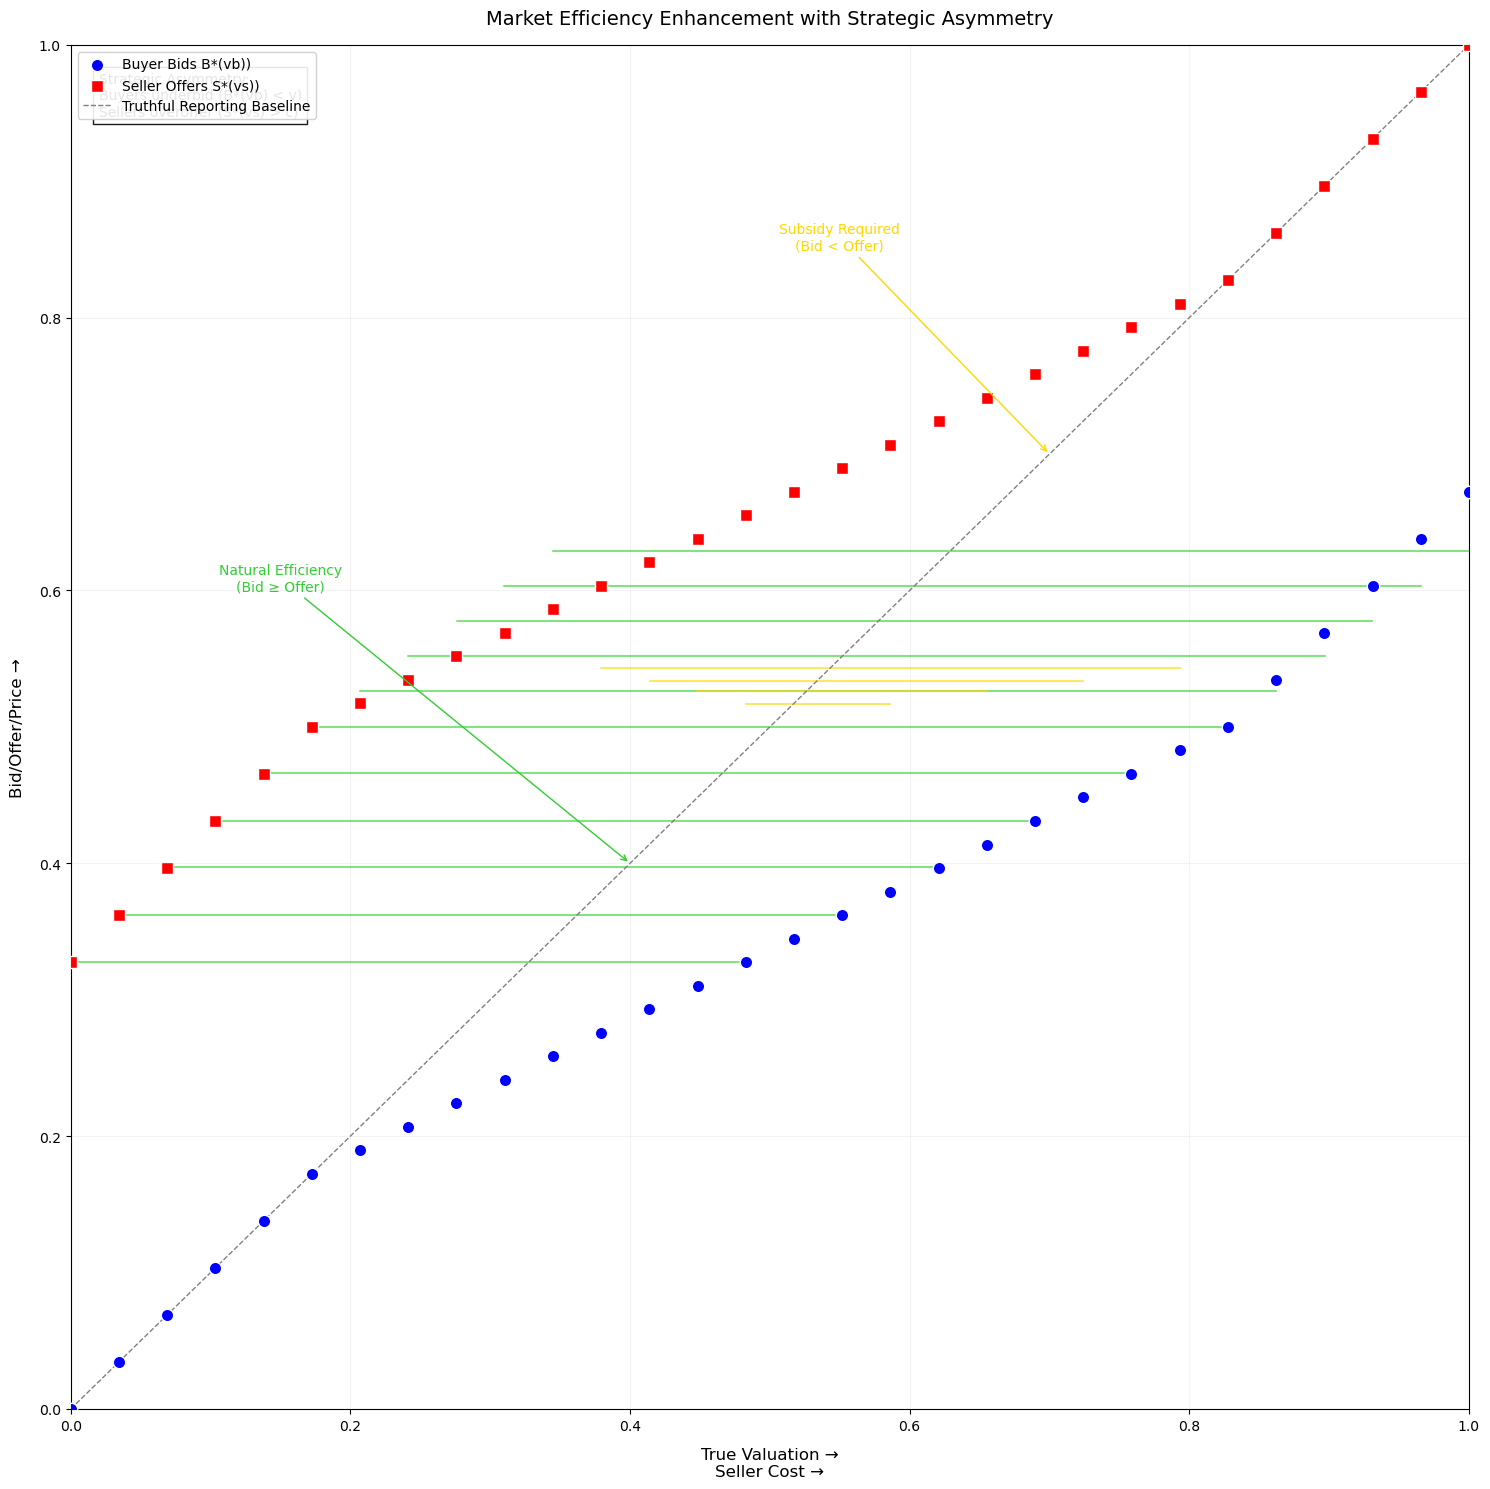


Strategic Asymmetry Validation:
Mid-value Buyer Bid: 0.345
Mid-value Seller Offer: 0.672
Bid + Offer = 1.017 (Expected < 1.0)


In [117]:
# ----------------------------------------------------------------------------------
# Algorithmic Formalization of Figure 11 (Visualization of the "Good" Market Maker)
# ----------------------------------------------------------------------------------

def plot_subsidy_transfers(matched_pairs):
    """Enhanced visualization with targeted annotations and symmetry validation"""
    plt.figure(figsize=(15, 15))
    
    plt.scatter(equilibrium_vis_data['buyers']['values'], 
                equilibrium_vis_data['buyers']['bids'],
                c='blue', s=80, edgecolor='white',
                label='Buyer Bids B*(vb))', zorder=3)
    
    plt.scatter(equilibrium_vis_data['sellers']['values'], 
                equilibrium_vis_data['sellers']['offers'],
                c='red', s=80, edgecolor='white', marker='s',
                label='Seller Offers S*(vs))', zorder=3)
    
    for pair in matched_pairs:
        color = 'limegreen' if pair['subsidy'] == 0 else 'gold'
        plt.plot([pair['buyer_val'], pair['seller_val']],
                 [pair['price'], pair['price']],
                 color=color, alpha=0.6, linewidth=1.5,
                 solid_capstyle='round')

    plt.plot([0, 1], [0, 1], '--', c='gray', lw=1, 
            label='Truthful Reporting Baseline')
    
    plt.annotate('Natural Efficiency\n(Bid ≥ Offer)',
                xy=(0.4, 0.4), xytext=(0.15, 0.6),
                arrowprops=dict(arrowstyle="->", color='limegreen'),
                ha='center', color='limegreen', fontsize=10)
    
    plt.annotate('Subsidy Required\n(Bid < Offer)',
                xy=(0.7, 0.7), xytext=(0.55, 0.85),
                arrowprops=dict(arrowstyle="->", color='gold'),
                ha='center', color='gold', fontsize=10)

    plt.text(0.02, 0.98,
            "Strategic Asymmetry:\n"
            "Buyers underbid (B*(vb) < v)\n"
            "Sellers overoffer (S*(vs) > c)",
            transform=plt.gca().transAxes,
            ha='left', va='top',
            bbox=dict(facecolor='white', alpha=0.9))

    plt.title('Market Efficiency Enhancement with Strategic Asymmetry', pad=15, fontsize=14)
    plt.xlabel('True Valuation →\nSeller Cost →', fontsize=12, labelpad=10)
    plt.ylabel('Bid/Offer/Price →', fontsize=12, labelpad=10)
    plt.legend(loc='upper left', frameon=True, framealpha=0.9)
    plt.grid(True, alpha=0.15)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

    def test_strategic_symmetry():
        """Confirm expected asymmetric strategies"""
        mid_idx = len(buyer_strat) // 2
        buyer_mid = buyer_strat.iloc[mid_idx]['Optimal Bid B*(vb)']
        seller_mid = seller_strat.iloc[mid_idx]['Optimal Offer S*(vs)']
        
        print("\nStrategic Asymmetry Validation:")
        print(f"Mid-value Buyer Bid: {buyer_mid:.3f}")
        print(f"Mid-value Seller Offer: {seller_mid:.3f}")
        print(f"Bid + Offer = {buyer_mid + seller_mid:.3f} (Expected < 1.0)")
    
    test_strategic_symmetry()

plot_subsidy_transfers(matched_pairs)

In [118]:
# ----------------------------------------------------------------------
# Algorithmic Formalization of the "Evil" Market Maker from Section 6.2
# ----------------------------------------------------------------------

import numpy as np

def evil_mm(b_vals, b_bids, s_vals, s_offers, manipulation=0.3):
    """
    Matches buyers/sellers by manipulating bids/offers to maximize profit.
    Implements O(n log n) matching with strategic price manipulation.
    Returns:
        tuple: (matched_pairs, total_profit)
    """
    if not 0 <= manipulation <= 1:
        raise ValueError("Manipulation parameter must be between 0 and 1")
    
    # ------------------------------------------------------------------
    # Algorithmic Formulation of Definition 12 (Bid offer Manipulation)
    # ------------------------------------------------------------------
    
                                                              # --------------
    adjusted_bids = [min(bb + manipulation*(bv - bb), bv)     # Equation (39)
                    for bv, bb in zip(b_vals, b_bids)]        # --------------
    
                                                              # --------------
    adjusted_offers = [max(so - manipulation*(so - sv), sv)   # Equation (40)
                      for sv, so in zip(s_vals, s_offers)]    # --------------
    
    # --------------------------------------------------------------------
    # Algorithmic Formalization of Method 11 (Strategic Matching Process)
    # --------------------------------------------------------------------
    
    candidates = []
    for i, ab in enumerate(adjusted_bids):
        for j, ao in enumerate(adjusted_offers):
            if ab >= ao:
                profit = ab - ao
                candidates.append((i, j, profit))
                
    # -----------------------------------------------
    # Sort by Descending Profit for (c) in Method 11
    # -----------------------------------------------
    
    candidates.sort(key=lambda x: -x[2])
    
    # ----------------
    # Greedy Matching
    # ----------------
    
    used_b, used_s = set(), set()
    matched_pairs = []
    total_profit = 0.0

    for i, j, profit in candidates:
        if i not in used_b and j not in used_s:
            used_b.add(i)
            used_s.add(j)
            orig_bid = b_bids[i]
            orig_offer = s_offers[j]
            price = (adjusted_bids[i] + adjusted_offers[j])/2
            
            matched_pairs.append({
                "buyer_val": round(b_vals[i], 3),
                "original_bid": round(orig_bid, 3),
                "adjusted_bid": round(adjusted_bids[i], 3),
                "seller_val": round(s_vals[j], 3),
                "original_offer": round(orig_offer, 3),
                "adjusted_offer": round(adjusted_offers[j], 3),
                "profit": round(profit, 3),
                "price": round(price, 3)
            })
            total_profit += profit

    total_profit = round(total_profit, 3)
    return matched_pairs, total_profit

# ----------------------------------------------------------------------------------
# Print Figure 12 (First 10 and Last 10 Trades for the "Evil" Market Making Entity)
# ----------------------------------------------------------------------------------

b_vals = equilibrium_vis_data['buyers']['values']
b_bids = equilibrium_vis_data['buyers']['bids']
s_vals = equilibrium_vis_data['sellers']['values']
s_offers = equilibrium_vis_data['sellers']['offers']

matched_pairs, total_profit = evil_mm(b_vals, b_bids, s_vals, s_offers, manipulation=0.3)

profits = [p['profit'] for p in matched_pairs]
profit_stats = {
    'max': max(profits) if profits else 0,
    'min': min(profits) if profits else 0,
    'median': np.median(profits) if profits else 0,
    'mean': total_profit/len(profits) if profits else 0
}

print("\nStrategic Market Maker Analysis")
print("=" * 60)
print(f"{'Total Trades:':<25} {len(matched_pairs)}")
print(f"{'Total Profit:':<25} {total_profit:.3f}")
print(f"{'Average Profit/Trade:':<25} {profit_stats['mean']:.3f}")
print("\nProfit Distribution:")
print(f"{'Maximum Profit:':<25} {profit_stats['max']:.3f}")
print(f"{'Minimum Profit:':<25} {profit_stats['min']:.3f}")
print(f"{'Median Profit:':<25} {profit_stats['median']:.3f}")
print("\nFirst 10 Trades (Highest Profit):")
print("-" * 60)
for idx, pair in enumerate(matched_pairs[:10], 1):
    print(f"Trade {idx}:")
    print(f"  Buyer(v={pair['buyer_val']:.3f}): {pair['original_bid']:.3f} → {pair['adjusted_bid']:.3f}")
    print(f"  Seller(c={pair['seller_val']:.3f}): {pair['original_offer']:.3f} → {pair['adjusted_offer']:.3f}")
    print(f"  Price: {pair['price']:.3f} | Profit: {pair['profit']:.3f}\n")

print("\nLast 10 Trades (Lowest Profit):")
print("-" * 60)
start_idx = max(0, len(matched_pairs)-10)
for idx, pair in enumerate(matched_pairs[start_idx:], start_idx+1):
    print(f"Trade {idx}:")
    print(f"  Buyer(v={pair['buyer_val']:.3f}): {pair['original_bid']:.3f} → {pair['adjusted_bid']:.3f}")
    print(f"  Seller(c={pair['seller_val']:.3f}): {pair['original_offer']:.3f} → {pair['adjusted_offer']:.3f}")
    print(f"  Price: {pair['price']:.3f} | Profit: {pair['profit']:.3f}\n")

print("=" * 60)
print("Note: Arrows (→) show bid/offer manipulation direction")
print("=" * 60)


Strategic Market Maker Analysis
Total Trades:             10
Total Profit:             2.552
Average Profit/Trade:     0.255

Profit Distribution:
Maximum Profit:           0.541
Minimum Profit:           0.017
Median Profit:            0.232

First 10 Trades (Highest Profit):
------------------------------------------------------------
Trade 1:
  Buyer(v=1.000): 0.672 → 0.771
  Seller(c=0.000): 0.328 → 0.229
  Price: 0.500 | Profit: 0.541

Trade 2:
  Buyer(v=0.966): 0.638 → 0.736
  Seller(c=0.034): 0.362 → 0.264
  Price: 0.500 | Profit: 0.472

Trade 3:
  Buyer(v=0.931): 0.603 → 0.702
  Seller(c=0.069): 0.397 → 0.298
  Price: 0.500 | Profit: 0.403

Trade 4:
  Buyer(v=0.897): 0.569 → 0.667
  Seller(c=0.103): 0.431 → 0.333
  Price: 0.500 | Profit: 0.334

Trade 5:
  Buyer(v=0.862): 0.534 → 0.633
  Seller(c=0.138): 0.466 → 0.367
  Price: 0.500 | Profit: 0.266

Trade 6:
  Buyer(v=0.828): 0.500 → 0.598
  Seller(c=0.172): 0.500 → 0.402
  Price: 0.500 | Profit: 0.197

Trade 7:
  Buyer(v=0.793

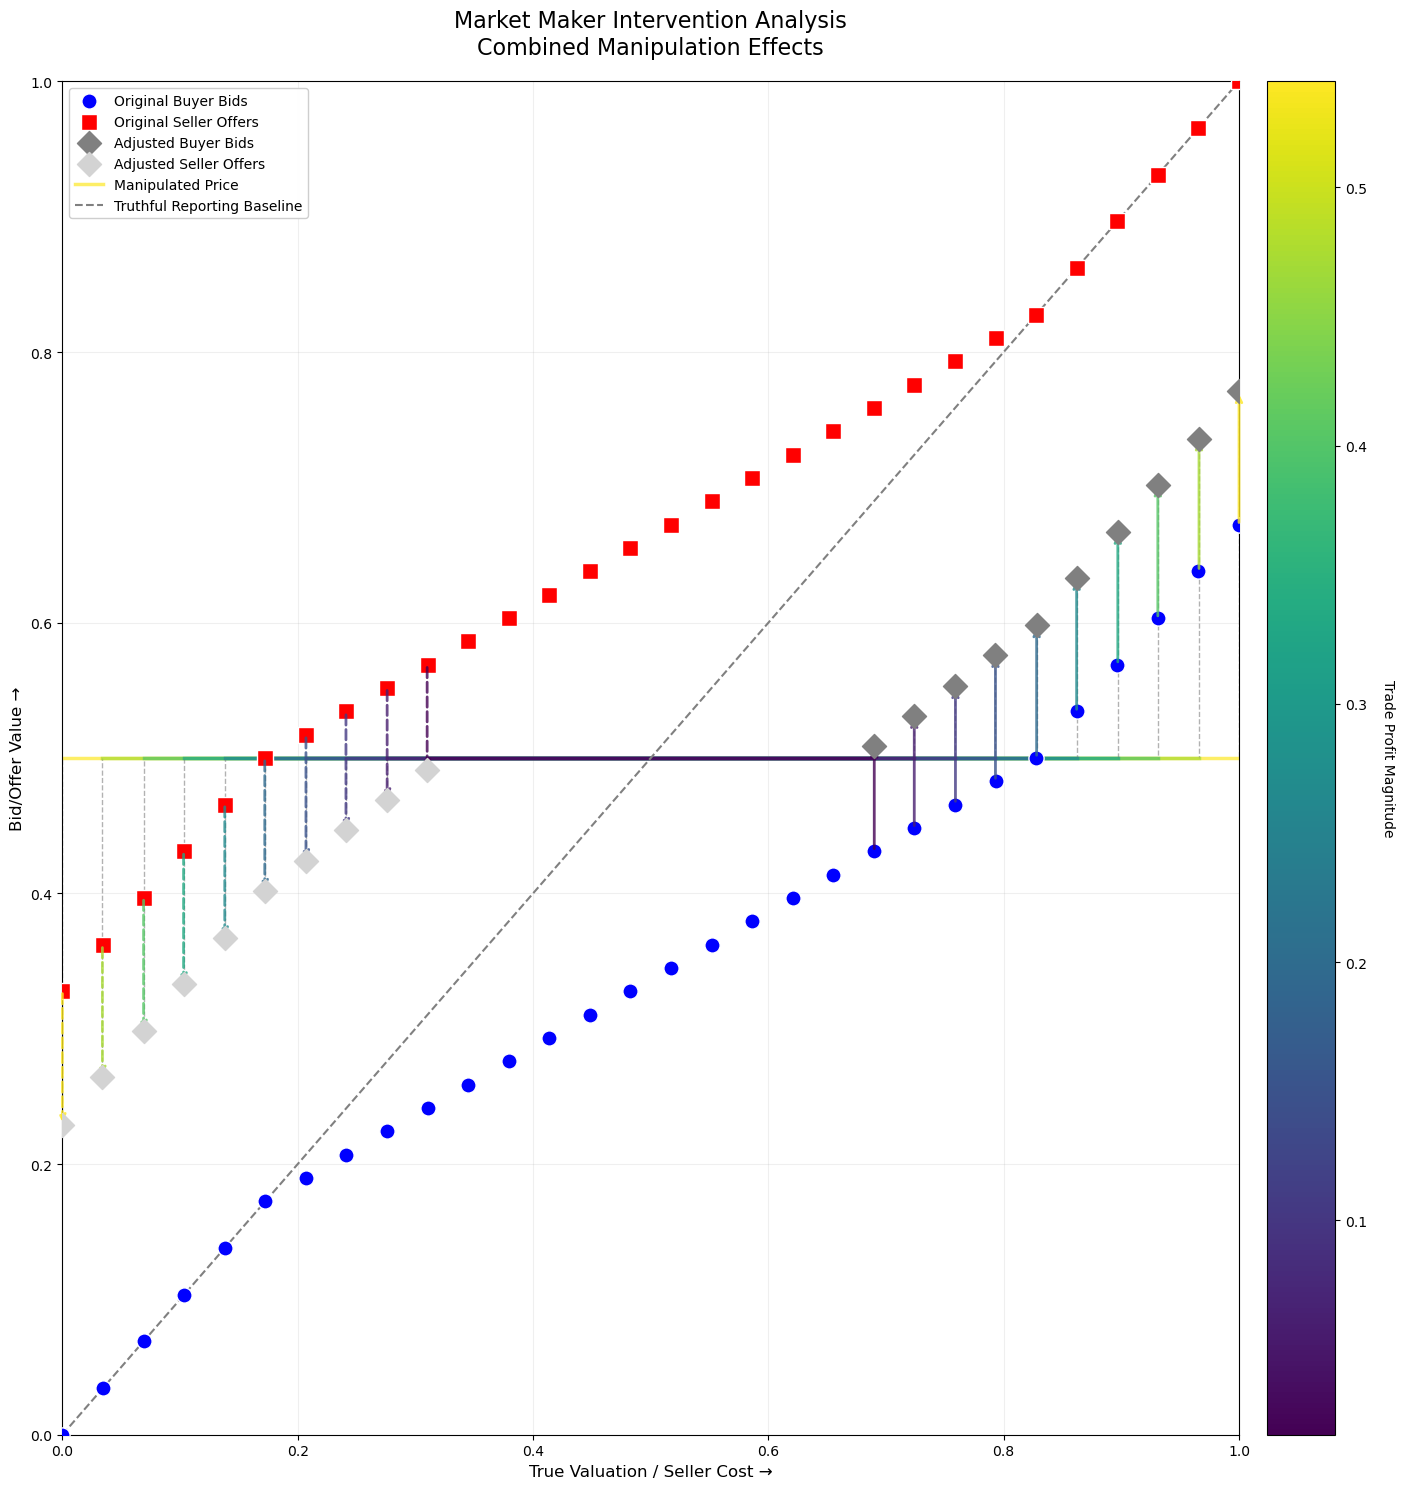

In [119]:
# ----------------------------------------------------------------------------------
# Algorithmic Formalization of Figure 13 (Visualization of the "Evil" Market Maker)
# ----------------------------------------------------------------------------------

def plot_combined_manipulation(matched_pairs):
    """Combined visualization of market manipulation effects"""
    fig, ax = plt.subplots(figsize=(15, 15))
    
    # Create colormap based on profit magnitude
    profits = [p['profit'] for p in matched_pairs]
    cmap = plt.cm.viridis
    norm = plt.Normalize(min(profits), max(profits))
    
    ax.scatter(equilibrium_vis_data['buyers']['values'], 
               equilibrium_vis_data['buyers']['bids'],
               c='blue', s=120, edgecolor='white', zorder=3,
               label='Original Buyer Bids')
    
    ax.scatter(equilibrium_vis_data['sellers']['values'], 
               equilibrium_vis_data['sellers']['offers'],
               c='red', s=120, edgecolor='white', marker='s', zorder=3,
               label='Original Seller Offers')

    adjusted_buyer_vals = [p['buyer_val'] for p in matched_pairs]
    adjusted_buyer_bids = [p['adjusted_bid'] for p in matched_pairs]
    adjusted_seller_vals = [p['seller_val'] for p in matched_pairs]
    adjusted_seller_offers = [p['adjusted_offer'] for p in matched_pairs]
    
    ax.scatter(adjusted_buyer_vals, adjusted_buyer_bids,
               c='gray', s=150, marker='D', zorder=4,
               label='Adjusted Buyer Bids')
    
    ax.scatter(adjusted_seller_vals, adjusted_seller_offers,
               c='lightgray', s=150, marker='D', zorder=4,
               label='Adjusted Seller Offers')

    for idx, pair in enumerate(matched_pairs):
        ax.annotate('', xytext=(pair['buyer_val'], pair['original_bid']),
                   xy=(pair['buyer_val'], pair['adjusted_bid']),
                   arrowprops=dict(arrowstyle="->", color=cmap(norm(pair['profit'])), 
                   lw=2, alpha=0.8))
        
        ax.annotate('', xytext=(pair['seller_val'], pair['original_offer']),
                   xy=(pair['seller_val'], pair['adjusted_offer']),
                   arrowprops=dict(arrowstyle="->", color=cmap(norm(pair['profit'])), 
                   lw=2, alpha=0.8, linestyle='--'))

        ax.plot([pair['buyer_val'], pair['buyer_val']],
                [pair['adjusted_bid'], pair['price']],
                color='gray', linestyle='--', alpha=0.6, lw=1)
        
        ax.plot([pair['seller_val'], pair['seller_val']],
                [pair['adjusted_offer'], pair['price']],
                color='gray', linestyle='--', alpha=0.6, lw=1)

        ax.plot([pair['buyer_val'], pair['seller_val']],
                [pair['price'], pair['price']],
                color=cmap(norm(pair['profit'])), alpha=0.7, lw=2.5,
                label='Manipulated Price' if idx == 0 else None)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = fig.colorbar(sm, ax=ax, pad=0.02)
    cbar.set_label('Trade Profit Magnitude', rotation=270, labelpad=20)

    ax.plot([0, 1], [0, 1], '--', c='gray', lw=1.5,
           label='Truthful Reporting Baseline')
    
    ax.set_title("Market Maker Intervention Analysis\nCombined Manipulation Effects", 
                fontsize=16, pad=20)
    ax.set_xlabel("True Valuation / Seller Cost →", fontsize=12)
    ax.set_ylabel("Bid/Offer Value →", fontsize=12)
    ax.legend(loc='upper left', framealpha=0.95)
    ax.grid(alpha=0.2)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

plot_combined_manipulation(matched_pairs)

In [ ]:
########################################   END OF WORKBOOK   ######################################## 